In [5]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [6]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [7]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','area','areayieldrataio','yield','rainfallaverage','fgprice','rainfall24'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','dctrice','windspeed','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [8]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [9]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [10]:
X.shape, y.shape

((15401, 6), (15401, 1))

In [11]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
y_train

,rainfall24
2998,0.032979
16149,1.173936
1106,2.052083
1368,3.120833
8530,0.778083
...,...
14774,1.720567
35629,1.876596
15169,3.620213
2172,1.111631


In [13]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [14]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rainfall24  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   windspeed  12320 non-null  float64
 1   rainfall6  12320 non-null  float64
 2   distance   12320 non-null  float64
 3   darea      12320 non-null  float64
 4   yielda     12320 non-null  float64
 5   dctrice    12320 non-null  float64
dtypes: float64(6)
memory usage: 673.8 KB


In [15]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [16]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [17]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [18]:
X_val

,windspeed,rainfall6,distance,darea,yielda,dctrice
31511,15.974263,0.027381,150.223900,19.625815,0.491842,166383.41
31001,44.970222,6.691667,3.731118,12.878894,0.558085,123889.89
38328,7.252452,6.300000,280.959300,296.667121,0.398589,1536174.95
8001,33.878516,0.213333,85.724430,300.465465,0.407646,2111223.37
31097,11.845751,0.000000,197.586500,108.629224,0.851640,1594627.94
...,...,...,...,...,...,...
7596,36.262834,1.597917,74.362240,32.378801,0.483133,269639.60
36565,3.864767,0.422128,353.282200,84.405962,1.606316,1761368.40
11299,10.844943,0.000000,213.400400,686.206068,1.860157,22001926.78
6724,16.338128,0.122500,190.806200,322.134634,1.059653,5883799.95


In [19]:
y_train

,rainfall24
2998,0.032979
16149,1.173936
1106,2.052083
1368,3.120833
8530,0.778083
...,...
14774,1.720567
35629,1.876596
15169,3.620213
2172,1.111631


In [20]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [21]:
# Null Remover

nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

print(np.where(pd.isnull(X_val)))

(array([], dtype=int64), array([], dtype=int64))


In [22]:
X_train.shape,y_train.shape

((12320, 6), (12320, 1))

In [23]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [25]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import load, dump
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Load the models
svr_pipeline = load('SVR-RAINF24.joblib')
rf = load('RFR-RAINF24.joblib')


final_estimator = RandomForestRegressor(
    
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_leaf_nodes=100,
    random_state=42,
)

# Create a StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=[('svr', svr_pipeline), ('rf', rf)],
    final_estimator=final_estimator
)

stacking_regressor.fit(X_train, y_train)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('svr',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('svr',
                                                SVR(C=1, coef0=3, degree=2,
                                                    gamma='auto',
                                                    kernel='poly'))])),
                              ('rf',
                               Pipeline(steps=[('randomforestregressor',
                                                RandomForestRegressor(max_depth=20,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=2,
                                                                      random_state=42))]))],
                  final_estimator=RandomForestRegressor(max_depth=20,
                       

In [26]:

predictions = stacking_regressor.predict(X_test)

# Evaluate the model
r2 = stacking_regressor.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = stacking_regressor.predict(X_val)

# Evaluate the model


r2 = stacking_regressor.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.9256404874581762
Mean Absolute Error (Test): 0.3262824220134676

R-squared (Validation): 0.9217398302727098
Mean Absolute Error (Validation): 0.3106583206590298

Explained Variance (Test): 0.9256933166122986
Explained Variance (Validation): 0.9217556177135231

Mean Absolute Error (Test, p.p.): 18.132095691622578%
Mean Absolute Error (Validation, p.p.): 19.60744617375739%


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   windspeed  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


In [27]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['0.05', '2.42', '3.04', '0.05', '0.05', '2.74', '2.07', '4.03', '0.54', '0.05', '4.65', '0.65', '3.25', '3.45', '3.12', '4.73', '1.43', '1.09', '0.05', '0.22', '1.63', '2.12', '0.75', '1.32', '1.88', '1.43', '0.94', '0.94', '0.75', '5.39', '1.50', '0.94', '2.35', '2.77', '0.05', '2.09', '1.59', '0.22', '3.25', '3.57', '0.05', '2.89', '0.94', '3.12', '12.93', '3.85', '0.06', '7.08', '1.67', '0.05', '0.22', '0.05', '3.90', '2.35', '0.74', '0.78', '0.05', '0.05', '0.05', '2.06', '0.05', '0.22', '2.32', '1.58', '0.22', '4.32', '2.30', '2.71', '3.04', '0.10', '1.14', '7.40', '0.92', '3.24', '3.34', '3.49', '0.05', '0.05', '1.82', '0.22', '0.65', '0.41', '1.46', '1.43', '0.22', '0.05', '7.90', '2.00', '3.40', '2.34', '2.12', '4.72', '0.75', '0.79', '0.22', '2.28', '3.25', '0.06', '7.67', '0.41', '3.87', '2.84', '0.74', '2.32', '0.41', '0.05', '2.18', '1.67', '0.94', '0.05', '7.97', '4.04', '0.05', '0.78', '3.32', '0.37', '2.26', '1.74', '0.05', '2.47', '0.38', '0.05', '0.05', '0.05', '1.43'

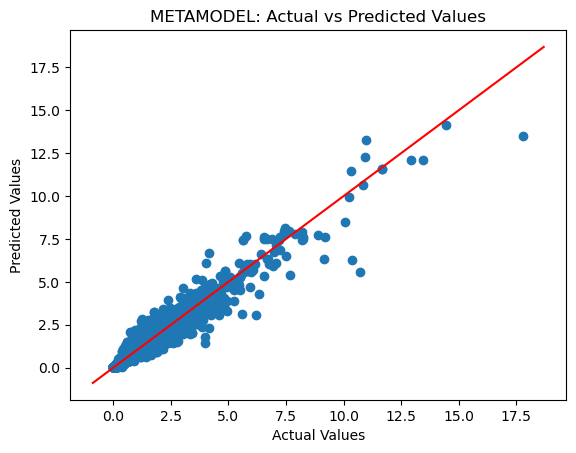

In [28]:
import matplotlib.pyplot as plt

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

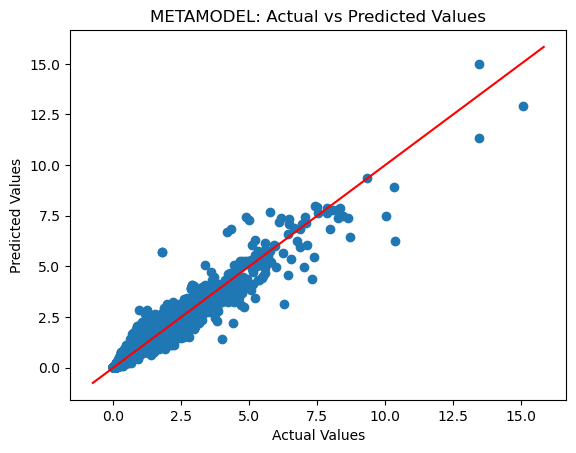

In [30]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = stacking_regressor.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [31]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

       Actual Predicted
0    0.003646      0.05
1    2.382083      3.02
2    0.051042      0.05
3    0.381944      0.41
4    1.219792      1.43
5    3.034524      3.00
6    3.989628      1.78
7    3.709167      4.03
8    0.196454      0.22
9    2.296277      1.67
10   1.081771      1.94
11   3.369149      3.22
12   0.638690      1.14
13   1.598611      1.43
14   2.644643      2.28
15   0.003191      0.05
16   5.168125      5.18
17   1.065833      1.43
18   0.000000      0.05
19  10.216667      9.93


In [33]:
from sklearn.pipeline import make_pipeline
from joblib import dump

pipeline = make_pipeline(stacking_regressor)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'STACKED-SVR_RF-RAINFALL23.joblib')

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['STACKED-SVR_RF-RAINFALL23.joblib']